In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(object-tracking)=
# Object Tracking Example

Consider an object of mass $m$ and position vector $\vec{r} = r_x\hat{i}+r_y\hat{j}$,
where $\hat{i}$ and $\hat{j}$ are the unit vectors in the x- and y-direction, respectively.
As we saw in the lecture video, the dynamics are given by Newton's law:

$$
m\frac{d^2\vec{r}}{dt^2} = \vec{F} = u_x\hat{i} + u_y\hat{j}.
$$

We also saw that these 2nd order differential equations can be written as four first-order differential equations:

$$
\frac{d\vec{r}}{dt} = \vec{v},
$$

and

$$
\frac{d\vec{v}}{dt} = \frac{u_x}{m}\hat{i} + \frac{u_y}{m}\hat{j}.
$$

Then, we used the Euler scheme with a timestep $\Delta t$ to numerically solve these equations, yielding:

$$
\vec{r}((n+1)\Delta t) = \vec{r}(n\Delta t) + \Delta t\vec{v}(n\Delta t),
$$

and

$$
\vec{v}((n+1)\Delta t) = \vec{v}(n\Delta t) + \Delta t\left(u_x\hat{i} + u_y\hat{j}\right).
$$

Writing the state vector as:

$$
\mathbf{x}_n =
\begin{bmatrix}
r_x(n\Delta t)\\
r_y(n\Delta t)\\
v_x(n\Delta t)
\end{bmatrix},
$$

and the control vector as:

$$
\mathbf{u}_n =
\begin{bmatrix}
u_x(n\Delta t)\\
u_y(n\Delta t)
\end{bmatrix},
$$

then we see that the system satisfies the linear transition equation:

$$
\mathbf{x}_{n+1} = \mathbf{A}\mathbf{x}_n + \mathbf{B}\mathbf{u}_n + \mathbf{z}_n,
$$

with transition matrix:

$$
\mathbf{A} =
\begin{bmatrix}
1 & 0 & \Delta t & 0\\
0 & 1 & 0 & \Delta t\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix},
$$

control matrix:

$$
\mathbf{B} = \begin{bmatrix}
0 & 0\\
0 & 0\\
\frac{\Delta t}{m} & 0\\
0 & \frac{\Delta t}{m}
\end{bmatrix}
$$

and we assume that

$$
\mathbf{z}_n \sim N(\mathbf{0},\mathbf{Q}),
$$

is some process noise with covariance matrix $\mathbf{Q}$.
Notice that the process noise does not appear in the original system.
We have included it by hand, and it is a modeling choice.
We take the process covariance matrix to be:

$$
Q = \begin{bmatrix}
\epsilon & 0 & 0 & 0\\
0 & \epsilon & 0 & 0\\
0 & 0 & \sigma^2_q & 0\\
0 & 0 & 0 & \sigma^2_q
\end{bmatrix},
$$

where we have included a small $\epsilon>0$, which is very small and captures the discretization error of the Euler scheme.
The variance $\sigma_q^2$ can be larger as it captures both the discretization error and any external forces to the system (forces that are not captured in $\mathbf{u}_n$).

Now, let's talk about the measurements.
Let's assume we measure a noisy version of the object's position.
This is typical of GPS measurements.
Mathematically, we have:

$$
\mathbf{y}_n = \mathbf{C}\mathbf{x}_n + \mathbf{w}_n,
$$

with

$$
C = \begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0
\end{bmatrix}
$$

with measurement covariance:

$$
R =
\begin{bmatrix}
\sigma_r^2 & 0 \\
0 & \sigma_r^2
\end{bmatrix}.
$$

This is it.
Now, let's define all the necessary quantities:

In [2]:
# The timestep
Dt = 0.5
# The mass
m = 1.0
# The variance for the process noise for position
epsilon = 1e-6
# The standard deviation for the process noise for velocity
sigma_q = 1e-2
# The standard deviation for the measurement noise for position
sigma_r = 0.1

# INITIAL CONDITIONS
# initial mean
mu0 = np.zeros((4,))
# initial covariance
V0 = np.array([0.1**2, 0.1**2, 0.1**2, 0.1**2]) * np.eye(4)

# TRANSITION MATRIX
A = np.array(
    [
        [1.0, 0, Dt, 0],
        [0.0, 1.0, 0.0, Dt],
        [0.0, 0.0, 1.0, 0.0],
        [0.0, 0.0, 0.0, 1.0]
    ]
)
# CONTROL MATRIX
B = np.array(
    [
        [0.0, 0.0],
        [0.0, 0.0],
        [Dt / m, 0.0],
        [0.0, Dt / m]
    ]
)
# PROCESS COVARIANCE
Q = (
    np.array(
        [epsilon, epsilon, sigma_q ** 2, sigma_q ** 2]
    )
    * np.eye(4)
)
# EMISSION MATRIX
C = np.array(
    [
        [1.0, 0.0, 0.0, 0.0],
        [0.0, 1.0, 0.0, 0.0]
    ]
)
# MEASUREMENT COVARIANCE
R = (
    np.array(
        [sigma_r ** 2, sigma_r ** 2]
    )
    * np.eye(2)
)

Now we are going to simulate a trajectory of this particle.

In [3]:
np.random.seed(12345)

# The number of steps in the trajectory
num_steps = 50
# Space to store the trajectory (each state is 4-dimensional)
true_trajectory = np.ndarray((num_steps + 1, 4))
# Space to store the observations (each observation is 2-dimensional)
observations = np.ndarray((num_steps, 2))

# Sample the initial conditions
x0 = mu0 + np.sqrt(np.diag(V0)) * np.random.randn(4)
true_trajectory[0] = x0

# Pick a set of pre-determined forces to be applied to the object
# so that it does something interesting
force = .1
omega = 2.0 * np.pi / 5
times = Dt * np.arange(num_steps + 1)
us = np.zeros((num_steps, 2))
us[:, 0] = force * np.cos(omega * times[1:])
us[:, 1] = force * np.sin(omega * times[1:])

# Sample the trajectory
for n in range(num_steps):
    x = (
        A @ true_trajectory[n]
        + B @ us[n] 
        + np.sqrt(np.diag(Q)) * np.random.randn(4)
    )
    true_trajectory[n+1] = x
    y = (
        C @ x
        + np.sqrt(np.diag(R)) * np.random.randn(2)
    )
    observations[n] = y

Here is a plot of the true trajectory along with the noisy GPS measurements:

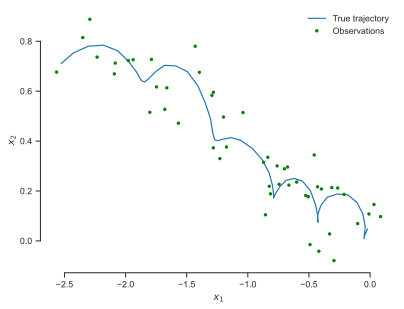

In [4]:
fig, ax = plt.subplots()
ax.plot(true_trajectory[:, 0], true_trajectory[:, 1], '-', label="True trajectory")
ax.plot(observations[:, 0], observations[:, 1], 'g.', label="Observations")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend(loc="best", frameon=False)
sns.despine(trim=True);

And here are the timeseries data of the states:

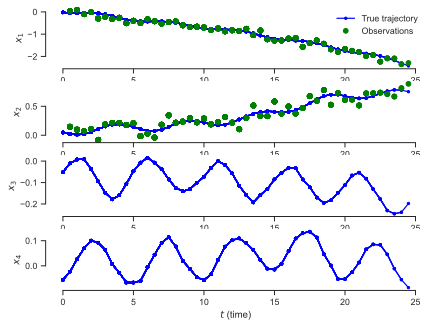

In [8]:
y_labels = ['$x_1$', '$x_2$', '$x_3$', '$x_4$']

res_x = 1024
res_y = 768
dpi = 150
w_in = res_x / dpi
h_in = res_y / dpi
fig, ax = plt.subplots(4, 1, dpi=dpi)
fig.set_size_inches(w_in, h_in)

for j in range(4):
    ax[j].set_ylabel(y_labels[j])
ax[-1].set_xlabel('$t$ (time)')

for n in range(1, num_steps):
    for j in range(4):
        ax[j].plot(times[:n+1], true_trajectory[:n+1, j], 'b.-', label="True trajectory")
        if j < 2:
            ax[j].plot(times[1:n+1], observations[:n, j], 'go', label="Observations")
        if j == 0 and n == 1:
            ax[j].legend(loc="best", frameon=False)
sns.despine(trim=True);

## Questions

+ Rerun the code a couple of times to observe different trajectories.
+ Double the process noise variance $\sigma_q^2$. What happens?
+ Double the measurement noise variance $\sigma_r^2$. What happens?
+ Zero-out the control vector $\mathbf{u}_{0:n-1}$. What happens?